1. Data collection and preprocessing
    * collect data
    * data cleaning
    * feature engineering
    * normalization
2. Exploratary data analysis
    * visualize data
    * statistical analysis
3. Model building
    * LSTM
        * data preparation
        * model design
        * compile model
        * train model
        * model evaluation
4. Forecasting
    * LSTM forecasting
5. Model evaluation
    * performance metrics
    * visual representation
Futher steps:
6. Deployment and monitoring
    * deploy model
    * monitor Performance
    * alert System

## Import libraries

In [106]:
# import all necessary libraries

import numpy as np
import pandas as pd

import yfinance as yf

import matplotlib.pyplot as plt
import datetime as dt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn

## Data collection and preprocessing

### Data collection

In [107]:
# Define the ticker symbol for the S&P 500 Index
ticker_symbol = "^GSPC"

# Last 10 years
end_date = pd.Timestamp.today()
start_date = end_date - pd.DateOffset(years=10)

spx_data = yf.download(ticker_symbol, start=start_date, end=end_date, interval='1d')
print(spx_data)

[*********************100%%**********************]  1 of 1 completed

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2014-06-24  1961.969971  1968.170044  1948.339966  1949.979980  1949.979980   
2014-06-25  1949.270020  1960.829956  1947.489990  1959.530029  1959.530029   
2014-06-26  1959.890015  1959.890015  1944.689941  1957.219971  1957.219971   
2014-06-27  1956.560059  1961.469971  1952.180054  1960.959961  1960.959961   
2014-06-30  1960.790039  1964.239990  1958.219971  1960.229980  1960.229980   
...                 ...          ...          ...          ...          ...   
2024-06-14  5424.080078  5432.390137  5403.750000  5431.600098  5431.600098   
2024-06-17  5431.109863  5488.500000  5420.399902  5473.229980  5473.229980   
2024-06-18  5476.149902  5490.379883  5471.319824  5487.029785  5487.029785   
2024-06-20  5499.990234  5505.529785  5455.560059  5473.169922  5473.169922   
2024-06-21  5466.770020  5478.310059  5452.029785  5

In [108]:
data = pd.DataFrame(spx_data)
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-06-24,1961.969971,1968.170044,1948.339966,1949.979980,1949.979980,3089700000
2014-06-25,1949.270020,1960.829956,1947.489990,1959.530029,1959.530029,3106710000
2014-06-26,1959.890015,1959.890015,1944.689941,1957.219971,1957.219971,2778840000
2014-06-27,1956.560059,1961.469971,1952.180054,1960.959961,1960.959961,4290590000
2014-06-30,1960.790039,1964.239990,1958.219971,1960.229980,1960.229980,3037350000


### Data cleaning

In [109]:
data.shape

# 2516 records available

(2516, 6)

In [110]:
data = data.reset_index()
data['Date'] = pd.to_datetime(data['Date'], utc=True)

In [112]:
data.info()
# date column is datetime format
# volume column is int dtype
# all other finance track data - float64 dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2516 entries, 0 to 2515
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   Date       2516 non-null   datetime64[ns, UTC]
 1   Open       2516 non-null   float64            
 2   High       2516 non-null   float64            
 3   Low        2516 non-null   float64            
 4   Close      2516 non-null   float64            
 5   Adj Close  2516 non-null   float64            
 6   Volume     2516 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 137.7 KB


In [113]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-06-24 00:00:00+00:00,1961.969971,1968.170044,1948.339966,1949.979980,1949.979980,3089700000
1,2014-06-25 00:00:00+00:00,1949.270020,1960.829956,1947.489990,1959.530029,1959.530029,3106710000
2,2014-06-26 00:00:00+00:00,1959.890015,1959.890015,1944.689941,1957.219971,1957.219971,2778840000
3,2014-06-27 00:00:00+00:00,1956.560059,1961.469971,1952.180054,1960.959961,1960.959961,4290590000
4,2014-06-30 00:00:00+00:00,1960.790039,1964.239990,1958.219971,1960.229980,1960.229980,3037350000


In [114]:
data_filtered = data[['Date','Open','High','Low','Close','Volume']]
data_filtered.head()

,Date,Open,High,Low,Close,Volume
0,2014-06-24 00:00:00+00:00,1961.969971,1968.170044,1948.339966,1949.979980,3089700000
1,2014-06-25 00:00:00+00:00,1949.270020,1960.829956,1947.489990,1959.530029,3106710000
2,2014-06-26 00:00:00+00:00,1959.890015,1959.890015,1944.689941,1957.219971,2778840000
3,2014-06-27 00:00:00+00:00,1956.560059,1961.469971,1952.180054,1960.959961,4290590000
4,2014-06-30 00:00:00+00:00,1960.790039,1964.239990,1958.219971,1960.229980,3037350000


In [115]:
data_filtered.isna().sum()

# no n/a in this dataset

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [19]:
data_filtered.tail()

,Date,Open,High,Low,Close,Volume
2512,2024-06-14 00:00:00+00:00,5424.080078,5432.390137,5403.750000,5431.600098,3438650000
2513,2024-06-17 00:00:00+00:00,5431.109863,5488.500000,5420.399902,5473.229980,3447840000
2514,2024-06-18 00:00:00+00:00,5476.149902,5490.379883,5471.319824,5487.029785,3544330000
2515,2024-06-20 00:00:00+00:00,5499.990234,5505.529785,5455.560059,5473.169922,3847060000
2516,2024-06-21 00:00:00+00:00,5466.770020,5478.310059,5452.029785,5464.620117,6773800000


### Feature engineering

In [20]:
# Calculate 3-day moving average
window_size = 3
data_filtered.loc[:, 'moving_avg'] = data_filtered['Close'].rolling(window=window_size).mean()
data_filtered.head()

,Date,Open,High,Low,Close,Volume,moving_avg
0,2014-06-23 00:00:00+00:00,1962.920044,1963.739990,1958.890015,1962.609985,2717630000,NaN
1,2014-06-24 00:00:00+00:00,1961.969971,1968.170044,1948.339966,1949.979980,3089700000,NaN
2,2014-06-25 00:00:00+00:00,1949.270020,1960.829956,1947.489990,1959.530029,3106710000,1957.373332
3,2014-06-26 00:00:00+00:00,1959.890015,1959.890015,1944.689941,1957.219971,2778840000,1955.576660
4,2014-06-27 00:00:00+00:00,1956.560059,1961.469971,1952.180054,1960.959961,4290590000,1959.236654


In [21]:
# calculate RSI

data_filtered.loc[:,'price_change'] = data_filtered['Close'].diff()

data_filtered.loc[:, 'gain'] = data_filtered['price_change'].apply(lambda x: x if x > 0 else 0)
data_filtered.loc[:,'loss'] = data_filtered['price_change'].apply(lambda x: -x if x < 0 else 0)

# Calculate average gain and average loss over 14 days
window_size = 14
data_filtered.loc[:, 'avg_gain'] = data_filtered['gain'].rolling(window=window_size).mean()
data_filtered.loc[:, 'avg_loss'] = data_filtered['loss'].rolling(window=window_size).mean()

# Calculate RS (Relative Strength)
data_filtered.loc[:, 'rs'] = data_filtered['avg_gain'] / data_filtered['avg_loss']

data_filtered.loc[:,'rsi'] = 100 - (100 / (1 + data_filtered['rs']))

data_filtered.tail()

,Date,Open,High,Low,Close,Volume,moving_avg,price_change,gain,loss,avg_gain,avg_loss,rs,rsi
2512,2024-06-14 00:00:00+00:00,5424.080078,5432.390137,5403.750000,5431.600098,3438650000,5428.790039,-2.140137,0.000000,2.140137,14.758545,5.695696,2.591175,72.153960
2513,2024-06-17 00:00:00+00:00,5431.109863,5488.500000,5420.399902,5473.229980,3447840000,5446.190104,41.629883,41.629883,0.000000,17.637835,5.695696,3.096695,75.590080
2514,2024-06-18 00:00:00+00:00,5476.149902,5490.379883,5471.319824,5487.029785,3544330000,5463.953288,13.799805,13.799805,0.000000,18.623535,2.903564,6.414025,86.512050
2515,2024-06-20 00:00:00+00:00,5499.990234,5505.529785,5455.560059,5473.169922,3847060000,5477.809896,-13.859863,0.000000,13.859863,18.623535,1.645682,11.316605,91.880879
2516,2024-06-21 00:00:00+00:00,5466.770020,5478.310059,5452.029785,5464.620117,6773800000,5474.939941,-8.549805,0.000000,8.549805,15.621408,2.256383,6.923209,87.378851


In [22]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          2517 non-null   datetime64[ns, UTC]
 1   Open          2517 non-null   float64            
 2   High          2517 non-null   float64            
 3   Low           2517 non-null   float64            
 4   Close         2517 non-null   float64            
 5   Volume        2517 non-null   int64              
 6   moving_avg    2515 non-null   float64            
 7   price_change  2516 non-null   float64            
 8   gain          2517 non-null   float64            
 9   loss          2517 non-null   float64            
 10  avg_gain      2504 non-null   float64            
 11  avg_loss      2504 non-null   float64            
 12  rs            2504 non-null   float64            
 13  rsi           2504 non-null   float64            
dtypes: datet

In [23]:
data_filtered['day_of_week'] = data_filtered['Date'].dt.dayofweek  # Monday=0, Sunday=6
data_filtered['month'] = data_filtered['Date'].dt.month
data_filtered['quarter'] = data_filtered['Date'].dt.quarter
data_filtered['year'] = data_filtered['Date'].dt.year

In [24]:
data_filtered.tail()

,Date,Open,High,Low,Close,Volume,moving_avg,price_change,gain,loss,avg_gain,avg_loss,rs,rsi,day_of_week,month,quarter,year
2512,2024-06-14 00:00:00+00:00,5424.080078,5432.390137,5403.750000,5431.600098,3438650000,5428.790039,-2.140137,0.000000,2.140137,14.758545,5.695696,2.591175,72.153960,4,6,2,2024
2513,2024-06-17 00:00:00+00:00,5431.109863,5488.500000,5420.399902,5473.229980,3447840000,5446.190104,41.629883,41.629883,0.000000,17.637835,5.695696,3.096695,75.590080,0,6,2,2024
2514,2024-06-18 00:00:00+00:00,5476.149902,5490.379883,5471.319824,5487.029785,3544330000,5463.953288,13.799805,13.799805,0.000000,18.623535,2.903564,6.414025,86.512050,1,6,2,2024
2515,2024-06-20 00:00:00+00:00,5499.990234,5505.529785,5455.560059,5473.169922,3847060000,5477.809896,-13.859863,0.000000,13.859863,18.623535,1.645682,11.316605,91.880879,3,6,2,2024
2516,2024-06-21 00:00:00+00:00,5466.770020,5478.310059,5452.029785,5464.620117,6773800000,5474.939941,-8.549805,0.000000,8.549805,15.621408,2.256383,6.923209,87.378851,4,6,2,2024


In [25]:
data_filtered.head()

,Date,Open,High,Low,Close,Volume,moving_avg,price_change,gain,loss,avg_gain,avg_loss,rs,rsi,day_of_week,month,quarter,year
0,2014-06-23 00:00:00+00:00,1962.920044,1963.739990,1958.890015,1962.609985,2717630000,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,0,6,2,2014
1,2014-06-24 00:00:00+00:00,1961.969971,1968.170044,1948.339966,1949.979980,3089700000,NaN,-12.630005,0.000000,12.630005,NaN,NaN,NaN,NaN,1,6,2,2014
2,2014-06-25 00:00:00+00:00,1949.270020,1960.829956,1947.489990,1959.530029,3106710000,1957.373332,9.550049,9.550049,0.000000,NaN,NaN,NaN,NaN,2,6,2,2014
3,2014-06-26 00:00:00+00:00,1959.890015,1959.890015,1944.689941,1957.219971,2778840000,1955.576660,-2.310059,0.000000,2.310059,NaN,NaN,NaN,NaN,3,6,2,2014
4,2014-06-27 00:00:00+00:00,1956.560059,1961.469971,1952.180054,1960.959961,4290590000,1959.236654,3.739990,3.739990,0.000000,NaN,NaN,NaN,NaN,4,6,2,2014


In [26]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          2517 non-null   datetime64[ns, UTC]
 1   Open          2517 non-null   float64            
 2   High          2517 non-null   float64            
 3   Low           2517 non-null   float64            
 4   Close         2517 non-null   float64            
 5   Volume        2517 non-null   int64              
 6   moving_avg    2515 non-null   float64            
 7   price_change  2516 non-null   float64            
 8   gain          2517 non-null   float64            
 9   loss          2517 non-null   float64            
 10  avg_gain      2504 non-null   float64            
 11  avg_loss      2504 non-null   float64            
 12  rs            2504 non-null   float64            
 13  rsi           2504 non-null   float64            
 14  day_of_w

In [27]:
data_filtered.describe()

,Open,High,Low,Close,Volume,moving_avg,price_change,gain,loss,avg_gain,avg_loss,rs,rsi,day_of_week,month,quarter,year
count,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2515.000000,2516.000000,2517.000000,2517.000000,2504.000000,2504.000000,2504.000000,2504.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,3158.222088,3175.079584,3140.099300,3158.778681,3.978980e+09,3158.338000,1.391896,12.297280,10.905937,12.315776,10.945857,1.811736,56.448986,2.024235,6.545093,2.513707,2018.967422
std,968.038497,973.606618,962.472692,968.467449,9.608975e+08,967.180917,35.712615,21.411995,23.411062,8.434359,10.966017,1.746198,16.295245,1.398034,3.426385,1.114790,2.916248
min,1833.400024,1847.000000,1810.099976,1829.079956,1.296530e+09,1844.383301,-324.890137,0.000000,0.000000,1.367850,0.322152,0.041774,4.009864,0.000000,1.000000,1.000000,2014.000000
25%,2259.239990,2264.030029,2249.229980,2257.830078,3.393290e+09,2260.758301,-11.540039,0.000000,0.000000,6.086622,4.005707,0.801489,44.490348,1.000000,4.000000,2.000000,2016.000000
50%,2886.580078,2895.949951,2873.280029,2885.570068,3.802000e+09,2886.643311,1.560059,1.550049,0.000000,10.198207,7.577131,1.327597,57.037233,2.000000,7.000000,3.000000,2019.000000
75%,4068.919922,4083.419922,4037.199951,4071.629883,4.327390e+09,4061.983398,16.982544,16.979980,11.520020,16.532122,14.681985,2.105370,67.797714,3.000000,10.000000,4.000000,2021.000000
max,5499.990234,5505.529785,5471.319824,5487.029785,9.976520e+09,5477.809896,230.380127,230.380127,324.890137,65.219291,102.318569,25.555257,96.234267,4.000000,12.000000,4.000000,2024.000000


In [28]:
data_filtered.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'moving_avg',
       'price_change', 'gain', 'loss', 'avg_gain', 'avg_loss', 'rs', 'rsi',
       'day_of_week', 'month', 'quarter', 'year'],
      dtype='object')

In [29]:
data_filtered.to_csv('data.csv')

## Explorative data analysis

### Visualize data

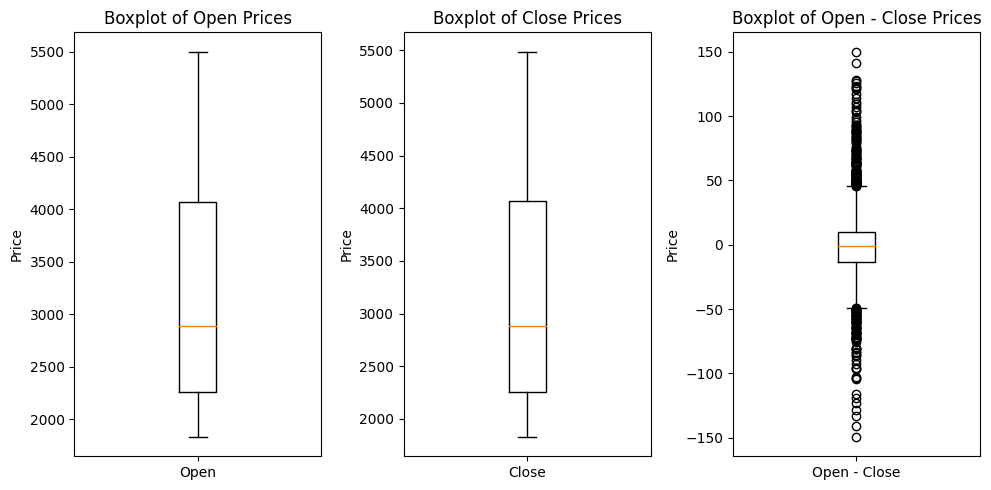

In [30]:
# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))

# Plot the boxplot for 'Open' on the first subplot
ax1.boxplot(data_filtered['Open'])
ax1.set_title('Boxplot of Open Prices')
ax1.set_ylabel('Price')
ax1.set_xticklabels(['Open'])

# Plot the boxplot for 'Close' on the second subplot
ax2.boxplot(data_filtered['Close'])
ax2.set_title('Boxplot of Close Prices')
ax2.set_ylabel('Price')
ax2.set_xticklabels(['Close'])

# Plot the boxplot for 'Open - Close' on the third subplot
ax3.boxplot(data_filtered['Open'] - data_filtered['Close'])
ax3.set_title('Boxplot of Open - Close Prices')
ax3.set_ylabel('Price')
ax3.set_xticklabels(['Open - Close'])

# Adjust the layout
plt.tight_layout()

plt.show()


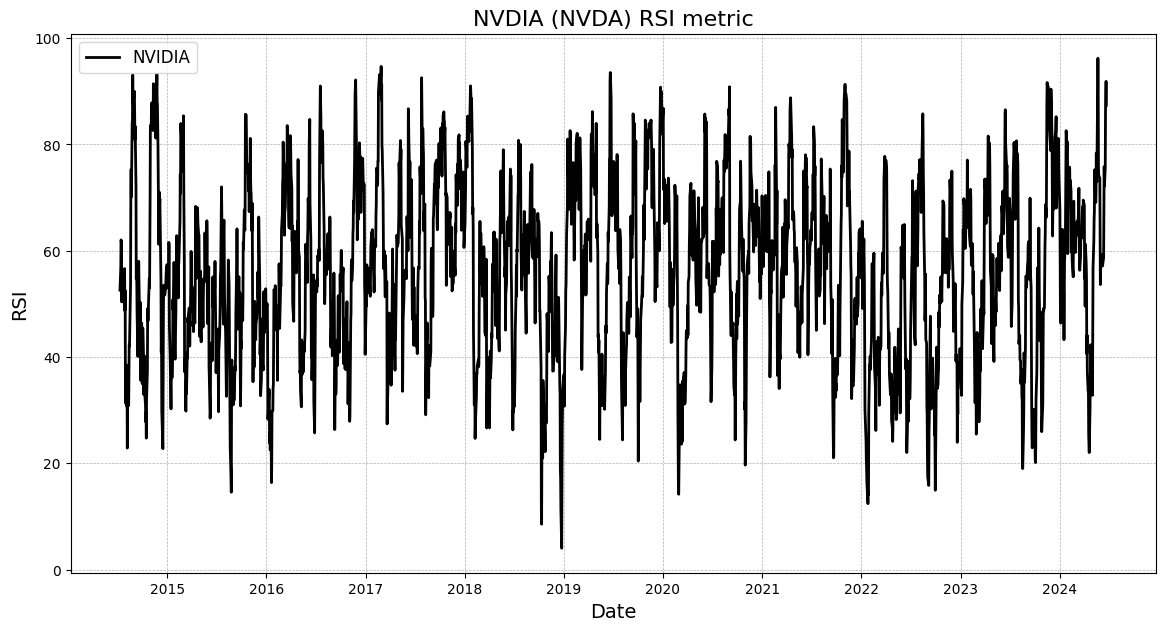

In [31]:
plt.figure(figsize=(14, 7))
plt.plot(data_filtered['Date'], data_filtered['rsi'], label='NVIDIA', color='black', linestyle='-', linewidth=2)

# Enhancing the plot
plt.title('NVDIA (NVDA) RSI metric', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('RSI', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

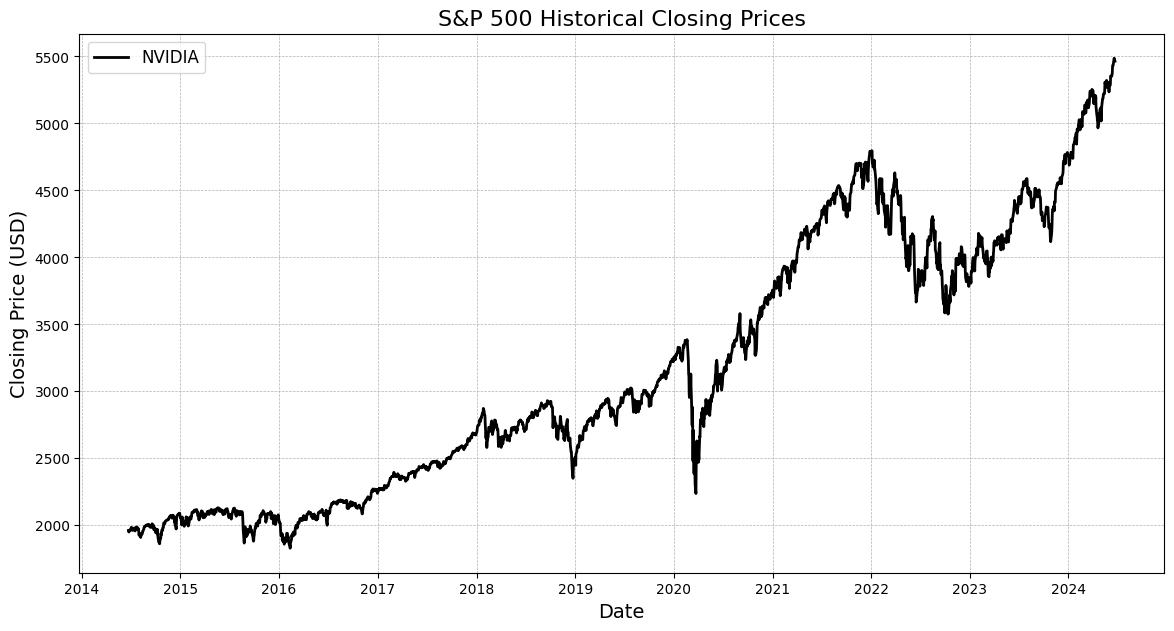

In [105]:
# date_chatgpt3 = pd.to_datetime("2022 11 30", utc=True)
# price_chatgpt3 = data_filtered.loc[data_filtered['Formatted_Date'] == "2022 11 30"].iloc[0, 3]

# date_chatgpt4 = pd.to_datetime("2023 03 14", utc=True)
# price_chatgpt4 = data_filtered.loc[data_filtered['Formatted_Date'] == "2023 03 14"].iloc[0, 3]

# dev_day_date = pd.to_datetime("2023 10 06", utc=True)
# price_devday = data_filtered.loc[data_filtered['Formatted_Date'] == "2023 10 06"].iloc[0, 3]

plt.figure(figsize=(14, 7))
plt.plot(data_filtered['Date'], data_filtered['Close'], label='NVIDIA', color='black', linestyle='-', linewidth=2)

# plt.scatter(date_chatgpt3, price_chatgpt3, color='red', label='ChatGPT3 Point',s=150)
# plt.scatter(date_chatgpt4, price_chatgpt4, color='green', label='ChatGPT4 Point',s=150)
# plt.scatter(dev_day_date, price_devday, color='orange', label='ChatGPT DevDay Point',s=150)

# Enhancing the plot
plt.title('S&P 500 Historical Closing Prices', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Closing Price (USD)', fontsize=14)
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()


### Statistical analysis

In [33]:
data_filtered.describe()

,Open,High,Low,Close,Volume,moving_avg,price_change,gain,loss,avg_gain,avg_loss,rs,rsi,day_of_week,month,quarter,year
count,2517.000000,2517.000000,2517.000000,2517.000000,2.517000e+03,2515.000000,2516.000000,2517.000000,2517.000000,2504.000000,2504.000000,2504.000000,2504.000000,2517.000000,2517.000000,2517.000000,2517.000000
mean,3158.222088,3175.079584,3140.099300,3158.778681,3.978980e+09,3158.338000,1.391896,12.297280,10.905937,12.315776,10.945857,1.811736,56.448986,2.024235,6.545093,2.513707,2018.967422
std,968.038497,973.606618,962.472692,968.467449,9.608975e+08,967.180917,35.712615,21.411995,23.411062,8.434359,10.966017,1.746198,16.295245,1.398034,3.426385,1.114790,2.916248
min,1833.400024,1847.000000,1810.099976,1829.079956,1.296530e+09,1844.383301,-324.890137,0.000000,0.000000,1.367850,0.322152,0.041774,4.009864,0.000000,1.000000,1.000000,2014.000000
25%,2259.239990,2264.030029,2249.229980,2257.830078,3.393290e+09,2260.758301,-11.540039,0.000000,0.000000,6.086622,4.005707,0.801489,44.490348,1.000000,4.000000,2.000000,2016.000000
50%,2886.580078,2895.949951,2873.280029,2885.570068,3.802000e+09,2886.643311,1.560059,1.550049,0.000000,10.198207,7.577131,1.327597,57.037233,2.000000,7.000000,3.000000,2019.000000
75%,4068.919922,4083.419922,4037.199951,4071.629883,4.327390e+09,4061.983398,16.982544,16.979980,11.520020,16.532122,14.681985,2.105370,67.797714,3.000000,10.000000,4.000000,2021.000000
max,5499.990234,5505.529785,5471.319824,5487.029785,9.976520e+09,5477.809896,230.380127,230.380127,324.890137,65.219291,102.318569,25.555257,96.234267,4.000000,12.000000,4.000000,2024.000000


* we can try different moving_avg window sizes
* the data is not stationary


## Model building

### LSTM

In [173]:
modelling_data = data_filtered[['Date','Close']]

In [118]:
modelling_data.head()

,Date,Close
0,2014-06-24 00:00:00+00:00,1949.979980
1,2014-06-25 00:00:00+00:00,1959.530029
2,2014-06-26 00:00:00+00:00,1957.219971
3,2014-06-27 00:00:00+00:00,1960.959961
4,2014-06-30 00:00:00+00:00,1960.229980


In [174]:
modelling_data.shape

(2516, 2)

In [119]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(modelling_data[['Close']].values)

In [144]:
#creates input-output pairs from a dataset
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 5
X, y = create_sequences(scaled_data, seq_length)

In [145]:
X[0]

array([[0.03305131],
       [0.03566207],
       [0.03503056],
       [0.03605298],
       [0.03585342]])

In [146]:
X.shape

(2511, 5, 1)

In [147]:
y.shape

(2511, 1)

In [148]:
y[0]

array([0.03943192])

In [ ]:
# split the data into training and test: 80/20
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
# prepare data for LSTM model

X_train_nn = torch.tensor(X_train, dtype=torch.float32)
y_train_nn = torch.tensor(y_train, dtype=torch.float32)
X_test_nn = torch.tensor(X_test, dtype=torch.float32)
y_test_nn = torch.tensor(y_test, dtype=torch.float32)

In [ ]:
# define LSTM architecture

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size  # defining the number of features in the hidden state of the LSTM
        self.num_layers = num_layers    # number of layers in the LSTM stack

        # defining LSTM layer itself
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        # linear fully conected layer to map the hidden state output of the LSTM to the desired output size
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # initialize the hidden state and cell state of the LSTM with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # LSTM returns output and the last hidden and cell states
        out, _ = self.lstm(x, (h0, c0))

        # apply the linear layer to the final hidden state of the last time step
        out = self.fc(out[:, -1, :])

        return out


In [82]:
# configure model

input_size = 1
hidden_size = 50
output_size = 1
num_layers = 2

# initialization
model = LSTMModel(input_size, hidden_size, output_size, num_layers)

#loss function - Mean Squared Error
criterion = nn.MSELoss()

#optimization function - Adam + setting learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [83]:
# train the model

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train_nn)
    optimizer.zero_grad()
    loss = criterion(outputs, y_train_nn)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.0204
Epoch [20/100], Loss: 0.0031
Epoch [30/100], Loss: 0.0014
Epoch [40/100], Loss: 0.0009
Epoch [50/100], Loss: 0.0003
Epoch [60/100], Loss: 0.0003
Epoch [70/100], Loss: 0.0003
Epoch [80/100], Loss: 0.0002
Epoch [90/100], Loss: 0.0002
Epoch [100/100], Loss: 0.0002


In [155]:
# Make predictions

model.eval()
with torch.no_grad():
    predictions = model(X_test_nn).detach().numpy()

# Inverse transform predictions to original scale

predicted_values = scaler.inverse_transform(predictions)
true_values = scaler.inverse_transform(y_test)


In [156]:
predicted_values[0]

array([3771.8064], dtype=float32)

In [157]:
true_values[0]

array([3759.88989258])

In [158]:
predicted_values.shape

(503, 1)

In [159]:
true_values.shape

(503, 1)

In [165]:
mse = np.mean((true_values - predicted_values) ** 2)
rmse = np.sqrt(mse)
print("Root mean squared error: " + str(round(rmse,2)))

Root mean squared error: 128.74


In [172]:
modelling_data.shape

(2511, 2)

In [175]:
modelling_data_reshaped = modelling_data[4:]

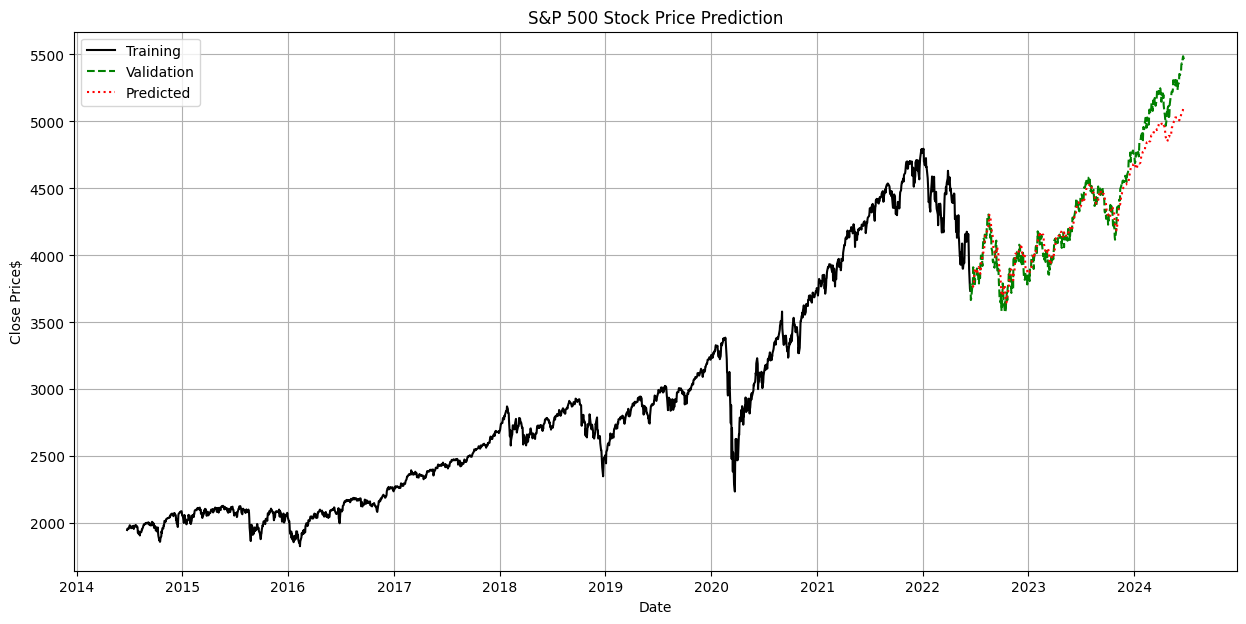

In [181]:
plt.figure(figsize=(15, 7))

# Plot training data
plt.plot(modelling_data['Date'][:train_size], modelling_data['Close'][:train_size],
         label='Training', color='black', linestyle='-')

# Plot validation data
plt.plot(modelling_data['Date'][train_size:], modelling_data['Close'][train_size:],
         label='Validation', color='green', linestyle='--')

# Plot predictions
plt.plot(modelling_data_reshaped['Date'][train_size:], predicted_values,
         label='Predicted', color='red', linestyle=':')

# Adding titles and labels
plt.title('S&P 500 Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price$')

plt.grid(True)
plt.legend()
plt.show()